In [47]:
%pylab inline

from importlib import reload
from scipy.stats import gaussian_kde
import tensorflow as tf
import gammastimator
from tensorflow.contrib.opt import ScipyOptimizerInterface
import pandas as pd
import simulate
from crystal import crystal
from tensorflow.python.client import device_lib

print("Version: {}".format(tf.__version__))
print(device_lib.list_local_devices())

inFN = "test/big_data.csv"
referenceFN = "test/1ubq.pdb.hkl"


cutoff = 0.1 #Minimum I/sigma -- regrettably essential right now

Populating the interactive namespace from numpy and matplotlib
Version: 1.10.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1529617560239862356
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 64618496
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1456627423538852365
physical_device_desc: "device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:3b:00.0, compute capability: 7.0"
]


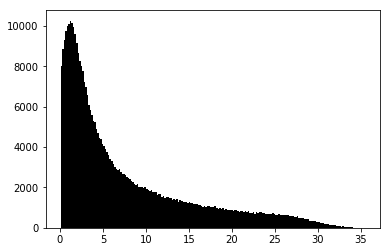

In [49]:
I = pd.read_csv(inFN)
I = I[I['IOBS']/I['SIGMA(IOBS)'] > cutoff]
c = crystal().read_hkl(referenceFN).unmerge()
_ = plt.hist(I['IOBS']/I['SIGMA(IOBS)'], 200, color='k')



In [50]:
!git pull

Already up-to-date.


In [ ]:
reload(gammastimator)

n = 20

cc = None
bins = None
for i in range(n):
    cc_,bins = gammastimator.cchalf(c, I, gammastimator.sparsedeltaFestimate, 10)
    if cc is None:
        cc = cc_
    else:
        cc = np.vstack((cc, cc_))


Number of reflection observations: 198480
Multiplicity: 4.2914594594594595
Number of ratio observations: 32371
Ratio multiplicity: 1.4603239049036856
Number of reflection observations: 198480
Multiplicity: 4.300851589416888
Number of ratio observations: 32550
Ratio multiplicity: 1.4627898615854755
Number of reflection observations: 198480
Multiplicity: 4.2937804218496485
Number of ratio observations: 32472
Ratio multiplicity: 1.45961253202679
Number of reflection observations: 198480
Multiplicity: 4.3045826194452275
Number of ratio observations: 32341
Ratio multiplicity: 1.4640561339972837
Number of reflection observations: 198480
Multiplicity: 4.299826689774696
Number of ratio observations: 32374
Ratio multiplicity: 1.4566479190101238
Number of reflection observations: 198480
Multiplicity: 4.302343225023302
Number of ratio observations: 32439
Ratio multiplicity: 1.4588505126821372
Number of reflection observations: 198480
Multiplicity: 4.300665207687808
Number of ratio observations: 3

In [ ]:
plt.violinplot(cc)